In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\Romek\\Downloads\\Export Trade History-2022-12-03 12_29_39.xlsx")

C:\Users\Romek\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df['Date(UTC)'] = pd.to_datetime(df['Date(UTC)'])
df = df.sort_values(by='Date(UTC)')

In [4]:
df

,Date(UTC),Market,Type,Price,Amount,Total,Fee,Fee Coin
273,2022-12-02 11:28:50,BTCUSDT,SELL,16967.84,0.00060,10.180704,0,BNB
272,2022-12-02 11:29:07,BTCUSDT,SELL,16980.84,0.00060,10.188504,0,BNB
271,2022-12-02 11:29:07,BTCUSDT,SELL,16993.84,0.00060,10.196304,0,BNB
270,2022-12-02 11:29:15,BTCUSDT,BUY,16996.00,0.00239,40.620440,0,BNB
269,2022-12-02 11:29:34,BTCUSDT,BUY,16983.53,0.00060,10.190118,0,BNB
...,...,...,...,...,...,...,...,...
4,2022-12-03 11:12:49,BTCUSDT,SELL,16928.49,0.00239,40.459091,0,BNB
3,2022-12-03 11:13:32,BTCUSDT,BUY,16915.49,0.00060,10.149294,0,BNB
2,2022-12-03 11:18:26,BTCUSDT,SELL,16928.49,0.00060,10.157094,0,BNB
1,2022-12-03 11:20:51,BTCUSDT,SELL,16941.49,0.00060,10.164894,0,BNB


In [5]:
df = df[df.Amount == 0.0006]

#### How many buy how many sell

In [6]:
df['Type'].value_counts()

SELL    135
BUY     115
Name: Type, dtype: int64

#### Avarage buy and average sell

In [7]:
buy = df[df.Type == 'BUY']
buy_mean = buy.Price.mean()
buy_mean

16988.93660869565

In [8]:
sell = df[df.Type == 'SELL']
sell_mean = sell.Price.mean()
sell_mean

16999.927185185184

In [9]:
# df = df.head(10)

In [10]:
buy_count = 0
sell_count = 0

buy_list = []
sell_list = []

profit_total_list = []


for index, row in df.iterrows():
    
    if row['Type'] == 'BUY':
        buy_date = row['Date(UTC)']
        buy = row['Type'] 
        price = row['Price']
        amount = row['Amount']
        total = row['Total']
        content = [buy_date, buy, price, amount, total]
        buy_list.append(content)
        buy_count += 1
        
    if row['Type'] == 'SELL':
        sell_date = row['Date(UTC)']
        sell = row['Type'] 
        price = row['Price']
        amount = row['Amount']
        total = row['Total']
        content = [sell_date, sell, price, amount, total]
        sell_list.append(content)
        sell_count += 1
        
    print(f'buy list: {len(buy_list)} sell_list: {len(sell_list)}')

    while len(buy_list) > 0 and len(sell_list) > 0:
        buy_transaction = buy_list[0]
        sell_transaction = sell_list[0]
        buy_total = buy_transaction[4]
        
        sell_total = sell_transaction[4]
        
        transaction_date = sell_transaction[0]
        profit_total = sell_total - buy_total
        profit_total = round(profit_total, 7)
        
        print(f'buy invest: {buy_total:.7f} sell income: {sell_total:.7f} total profit = {profit_total:.7f}')
        
        content = [transaction_date, profit_total]
        profit_total_list.append(content)
        
        buy_list.pop(0)
        sell_list.pop(0)

buy list: 0 sell_list: 1
buy list: 0 sell_list: 2
buy list: 0 sell_list: 3
buy list: 1 sell_list: 3
buy invest: 10.1901180 sell income: 10.1807040 total profit = -0.0094140
buy list: 0 sell_list: 3
buy list: 1 sell_list: 3
buy invest: 10.1901180 sell income: 10.1885040 total profit = -0.0016140
buy list: 0 sell_list: 3
buy list: 0 sell_list: 4
buy list: 1 sell_list: 4
buy invest: 10.1979180 sell income: 10.1963040 total profit = -0.0016140
buy list: 0 sell_list: 4
buy list: 0 sell_list: 5
buy list: 0 sell_list: 6
buy list: 0 sell_list: 7
buy list: 1 sell_list: 7
buy invest: 10.2213180 sell income: 10.1979180 total profit = -0.0234000
buy list: 1 sell_list: 6
buy invest: 10.1979180 sell income: 10.1979180 total profit = 0.0000000
buy list: 1 sell_list: 5
buy invest: 10.1921400 sell income: 10.2057180 total profit = 0.0135780
buy list: 0 sell_list: 5
buy list: 0 sell_list: 6
buy list: 0 sell_list: 7
buy list: 0 sell_list: 8
buy list: 1 sell_list: 8
buy invest: 10.2155400 sell income: 10.

In [11]:
profit_total_list

[[Timestamp('2022-12-02 11:28:50'), -0.009414],
 [Timestamp('2022-12-02 11:29:07'), -0.001614],
 [Timestamp('2022-12-02 11:29:07'), -0.001614],
 [Timestamp('2022-12-02 11:29:50'), -0.0234],
 [Timestamp('2022-12-02 11:32:48'), 0.0],
 [Timestamp('2022-12-02 11:33:03'), 0.013578],
 [Timestamp('2022-12-02 11:35:24'), -0.009822],
 [Timestamp('2022-12-02 11:35:24'), 0.005778],
 [Timestamp('2022-12-02 11:35:24'), 0.013578],
 [Timestamp('2022-12-02 11:35:24'), 0.029178],
 [Timestamp('2022-12-02 12:05:29'), -0.04374],
 [Timestamp('2022-12-02 12:07:13'), -0.02814],
 [Timestamp('2022-12-02 12:14:32'), -0.02034],
 [Timestamp('2022-12-02 12:16:26'), -0.02034],
 [Timestamp('2022-12-02 12:28:12'), -0.03666],
 [Timestamp('2022-12-02 12:44:10'), -0.04446],
 [Timestamp('2022-12-02 12:58:38'), -0.02886],
 [Timestamp('2022-12-02 12:59:48'), -0.01326],
 [Timestamp('2022-12-02 13:02:01'), 0.00234],
 [Timestamp('2022-12-02 13:02:27'), 0.029616],
 [Timestamp('2022-12-02 13:02:28'), 0.029616],
 [Timestamp('202

In [12]:
df = pd.DataFrame(profit_total_list)
columns = ['Date', 'profit_[USDT]' ]
df.columns = columns
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()
df['cumulative_profit_[USDT]'] = df['profit_[USDT]'].cumsum()

df

,profit_[USDT],cumulative_profit_[USDT]
Date,,
2022-12-02 11:28:50,-0.009414,-0.009414
2022-12-02 11:29:07,-0.001614,-0.011028
2022-12-02 11:29:07,-0.001614,-0.012642
2022-12-02 11:29:50,-0.023400,-0.036042
2022-12-02 11:32:48,0.000000,-0.036042
...,...,...
2022-12-03 02:01:53,0.079206,1.011858
2022-12-03 02:21:30,0.071406,1.083264
2022-12-03 03:01:00,0.071406,1.154670


<AxesSubplot:xlabel='Date'>

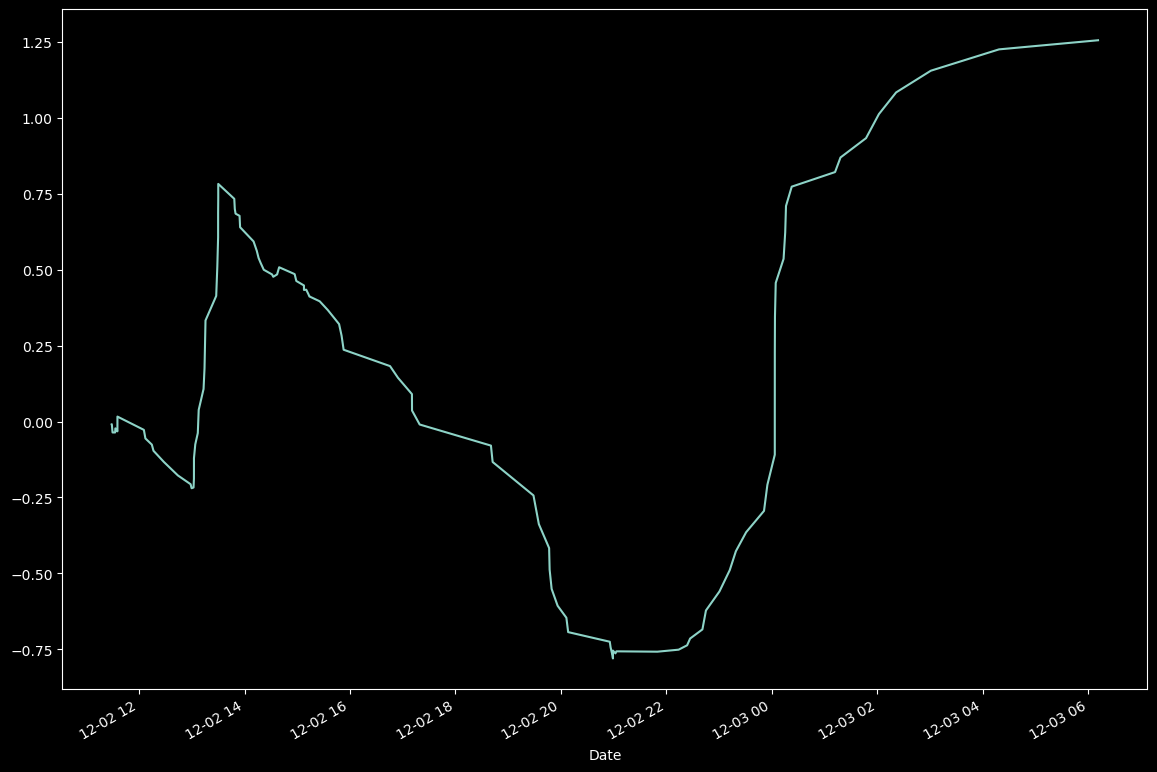

In [13]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (14, 10)
df['cumulative_profit_[USDT]'].plot()